Lucas da Silva Souza Correa - 202010408 <br />
Mateus Lucas - 202010520 <br />
Gabriel Almeida - 202010403 <br />
Matheus Sandi Vieira da Silva - 202010411

In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

A saída dos conjuntos de dados da visão da tocha são imagens PILImage do intervalo [0, 1]. Nós os transformamos em tensores de faixa normalizada [-1, 1].

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:12<00:00, 13342314.67it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Vamos ver algumas imagens só por diversão

  car  deer  bird  deer


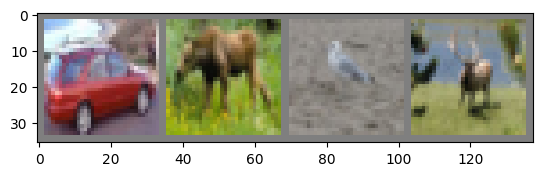

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Definir uma rede neural de convolução ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copie a rede neural antes e modifique-a para capturar imagens de 3 canais (em vez de imagens de 1 canal, conforme definido).



In [24]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 256)  # Aumenta o número de neurônios na primeira camada totalmente conectada
        self.fc2 = nn.Linear(256, 128)         # Diminui o número de neurônios na segunda camada totalmente conectada
        self.fc3 = nn.Linear(128, 84)          # Altera o número de neurônios na terceira camada totalmente conectada
        self.fc4 = nn.Linear(84, 10)           # Adiciona uma nova camada totalmente conectada

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))  # Usa uma função de ativação diferente para esta camada
        x = self.fc4(x)          # Camada de saída sem função de ativação
        return x

net = Net()


3. Definir uma função de perda e otimizador ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

Aqui é quando os pesos começam a ser otimizados:



In [19]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.000
[1,   201] loss: 0.050
[1,   401] loss: 0.050
[1,   601] loss: 0.046
[1,   801] loss: 0.049
[1,  1001] loss: 0.054
[1,  1201] loss: 0.048
[1,  1401] loss: 0.047
[1,  1601] loss: 0.056
[1,  1801] loss: 0.058
[1,  2001] loss: 0.056
[1,  2201] loss: 0.056
[1,  2401] loss: 0.049
[1,  2601] loss: 0.063
[1,  2801] loss: 0.064
[1,  3001] loss: 0.064
[1,  3201] loss: 0.056
[1,  3401] loss: 0.062
[1,  3601] loss: 0.051
[1,  3801] loss: 0.057
[1,  4001] loss: 0.055
[1,  4201] loss: 0.056
[1,  4401] loss: 0.060
[1,  4601] loss: 0.061
[1,  4801] loss: 0.060
[1,  5001] loss: 0.061
[1,  5201] loss: 0.060
[1,  5401] loss: 0.060
[1,  5601] loss: 0.064
[1,  5801] loss: 0.056
[1,  6001] loss: 0.059
[1,  6201] loss: 0.065
[1,  6401] loss: 0.064
[1,  6601] loss: 0.062
[1,  6801] loss: 0.061
[1,  7001] loss: 0.061
[1,  7201] loss: 0.060
[1,  7401] loss: 0.065
[1,  7601] loss: 0.062
[1,  7801] loss: 0.063
[1,  8001] loss: 0.061
[1,  8201] loss: 0.068
[1,  8401] loss: 0.058
[1,  8601] 

5. Testando a rede em dados de teste:
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Treinamos a rede por 2 épocas. Temos que checar se ela aprendeu:



GroundTruth:   ship horse  bird   dog


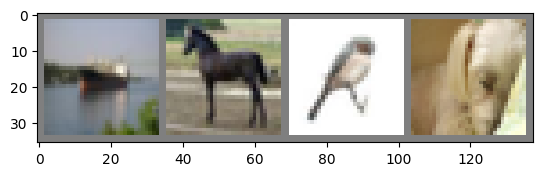

In [21]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


Ok, agora vamos ver o que a rede neural pensa que esses exemplos acima são:

In [22]:
outputs = net(images)

As saídas são energias para as 10 classes. Quanto maior a energia de uma classe, mais a rede pensa que a imagem é da classe específica. Então, vamos obter o índice da energia mais alta:

In [23]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship horse  bird   dog
